In [691]:
import pandas as pd

suicide_rates_df = pd.read_csv(r'./data/2019_who_crude_suicide_rates_per_100k_population_data.csv')
reduced_df = suicide_rates_df.filter(items=['Location', 'Dim1', 'Dim2', 'Value'])
country_names_from_data = set(suicide_rates_df.Location.to_numpy())

# TODO: to remove
filtered_df = suicide_rates_df.filter(items=['Location', 'Dim1', 'Dim2', 'Value'])

In [692]:
print(suicide_rates_df.columns)

Index(['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode',
       'ParentLocation', 'Location type', 'SpatialDimValueCode', 'Location',
       'Period type', 'Period', 'IsLatestYear', 'Dim1 type', 'Dim1',
       'Dim1ValueCode', 'Dim2 type', 'Dim2', 'Dim2ValueCode', 'Dim3 type',
       'Dim3', 'Dim3ValueCode', 'DataSourceDimValueCode', 'DataSource',
       'FactValueNumericPrefix', 'FactValueNumeric', 'FactValueUoM',
       'FactValueNumericLowPrefix', 'FactValueNumericLow',
       'FactValueNumericHighPrefix', 'FactValueNumericHigh', 'Value',
       'FactValueTranslationID', 'FactComments', 'Language', 'DateModified'],
      dtype='object')


In [693]:
from pathlib import Path
import pandas as pd 
import numpy as np 
from typing import Tuple


# TODO: Missing data / operations with fill values: -1 for country with no data


class SuicideRates:
    """a data class for suicide rates across many countries"""
    def __init__(self, csv_file_path: str):
        assert self.is_valid_csv(csv_file_path)
        self.raw_data_frame = pd.read_csv(csv_file_path)
        self._setup()
        del self.raw_data_frame
    
    def _setup(self) -> None:
        self._set_data_frame()
        self._set_year()
        self._set_all_countries()
    
    def is_valid_csv(self, file: str) -> bool:
        file_path = Path(file)
        return ((file_path.suffix == '.csv') 
                and (file_path.exists()))
    
    def _set_data_frame(self) -> None:
        self._data_frame = (self.raw_data_frame
                           .filter(
                            items=['Period', 'Location',  'Dim1', 'Dim2', 'Value']))

    def data_frame(self) -> pd.DataFrame:
        return self._data_frame 

    def _set_year(self) -> None:
        years = set(self.raw_data_frame.Period.to_numpy())
        assert len(years) == 1
        self._year = str(years.pop()) 
    
    def year(self) -> str:
        return self._year
    
    def _set_all_countries(self) -> None:
        self._all_countries = set(self.raw_data_frame.Location.to_numpy())
    
    def all_countries(self) -> Tuple[str]:
        return tuple(self._all_countries)

    def sums_in_countries_by_gender(self, gender: str) -> pd.DataFrame:
        """sum suicide rates by gender in each country"""
        assert gender in {'Both sexes', 'Male', 'Female'}
        return (self._data_frame[self._data_frame.Dim1 == gender]
                .groupby(['Period', 'Location'], as_index=False)
                ['Value'].sum())
    
    def sums_in_countries_by_age_group(self, age_group: str) -> pd.DataFrame:
        pass 



suicide_rates = SuicideRates(r'./data/2019_who_crude_suicide_rates_per_100k_population_data.csv')

assert suicide_rates.year() == '2019'
assert len(suicide_rates.all_countries()) > 100

print(suicide_rates.data_frame().head())
print()
print(suicide_rates.data_frame().tail())
print()

country_sums = suicide_rates.sums_in_countries_by_gender('Both sexes')
print(country_sums.head())

   Period             Location        Dim1                Dim2  Value
0    2019  Antigua and Barbuda  Both sexes         15-24 years    0.0
1    2019  Antigua and Barbuda  Both sexes  25-34 years of age    0.0
2    2019  Antigua and Barbuda  Both sexes  35-44 years of age    0.0
3    2019  Antigua and Barbuda  Both sexes         45-54 years    0.0
4    2019  Antigua and Barbuda  Both sexes         65-74 years    0.0

      Period                                   Location    Dim1         Dim2  \
4387    2019                                    Burundi    Male  75-84 years   
4388    2019  The former Yugoslav Republic of Macedonia    Male    85+ years   
4389    2019                                  Lithuania    Male    85+ years   
4390    2019                                   Ethiopia    Male  75-84 years   
4391    2019                                       Togo  Female    85+ years   

      Value  
4387  97.84  
4388  98.13  
4389  98.72  
4390  99.05  
4391  99.69  

   Period    

In [711]:
country_rates_df = suicide_rates.sums_in_countries_by_gender('Both sexes')
country_rates_df.sort_values(by='Value', inplace=True, ascending=True)

print(country_rates_df.head())
print()
print('Summay of suicide rate in all countries: \n', country_rates_df.describe())

     Period                          Location  Value
4      2019               Antigua and Barbuda   3.71
13     2019                          Barbados   4.45
66     2019                           Grenada   5.17
137    2019  Saint Vincent and the Grenadines   7.01
158    2019              Syrian Arab Republic  26.21

Summay of suicide rate in all countries: 
        Period        Value
count   183.0   183.000000
mean   2019.0   172.197705
std       0.0   139.900612
min    2019.0     3.710000
25%    2019.0    67.530000
50%    2019.0   121.950000
75%    2019.0   249.155000
max    2019.0  1020.270000


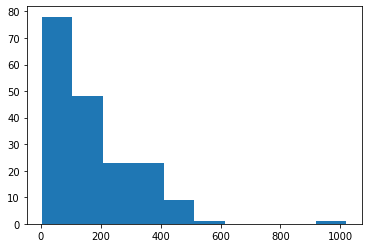

In [712]:
import matplotlib.pyplot as plt 

plt.hist(country_rates_df.Value)
plt.show()

In [714]:
from typing import Optional, Tuple

# TODO: rename to get_country_suicide_rate
def get_country_suicide_rate(country_name: str) -> float:
    """return the suicide rate of a country

    return -1 if the country is not found
    """
    country_df = country_rates_df[country_rates_df.Location == country_name]
    suicide_rate = -1 if country_df.empty else country_df.Value.values[0]
    return suicide_rate

assert get_country_suicide_rate('hahaha') == -1
assert get_country_suicide_rate('France') > 10


def xxx_get_country_rate(country_name: str) -> Tuple[bool, Optional[float]]:
    """return the suicide rate of a country"""
    country_df = country_rates_df[country_rates_df.Location == country_name]
    if country_df.empty:
        return (False, None)
    return country_df.Value.values[0]


In [697]:
from typing import Optional
import numpy as np 
from bisect import bisect

# colors in RGB
green_1 = np.array((204, 255, 179)) / 255
green_2 = np.array((204,255,153)) / 255
green_3 = np.array((213,255,128)) / 255
green_4 = np.array((229,255,102)) / 255

yellow_1 = np.array((255,255,77)) / 255
yellow_2 = np.array((255,221,51)) / 255
yellow_3 = np.array((255,179,25)) / 255

orange_1 = np.array((255,128,0)) / 255
orange_2 = np.array((230,76,0)) / 255

red = np.array((204,34,0)) / 255

black = np.array((0,0,0)) / 255

gray = np.array((212,213,214)) / 255


def rate_to_rgb_color(rate: Optional[float]) -> np.array:
    """suicide rate (per 100,000 population) to mapping color"""
    if rate is None:
        return gray
    if rate < 10:
        return green_1
    if rate < 30:
        return green_2
    if rate < 50:
        return green_3
    if rate < 70:
        return green_4
    if rate < 100:
        return yellow_1 
    if rate < 150:
        return yellow_2
    if rate < 200:
        return yellow_3
    if rate < 300:
        return orange_1 
    if rate < 400:
        return orange_2
    if rate < 600:
        return red 
    else:
        return black


# TODO: c_silver = 'silver
def xxx_rate_to_color(rate: Optional[float]) -> str:
    if rate is None:
        return 'silver'
    assert rate < 1100
    bounds = [10, 30, 60, 
              100, 200, 300, 
              400, 500, 700, 1100] 
    color_names = ['lime', 'yellowgreen', 'yellow', 
                   'gold', 'orange',  'salmon', 
                   'tomato', 'orangered','red', 'black']
    return color_names[bisect(bounds, rate)]


assert xxx_rate_to_color(None) == 'silver'
assert xxx_rate_to_color(3.3) == 'lime'
assert xxx_rate_to_color(10) == 'yellowgreen'
assert xxx_rate_to_color(1000) == 'black'

To install Cartopy on Window without Conda:
https://stackoverflow.com/questions/70177062/cartopy-not-able-to-identify-geos-for-proj-install-on-windows

then: 
pip install C:\Shapely\Shapely-1.8.2-cp310-cp310-win_amd64.whl

then:
pip install C:\Cartopy\Cartopy-0.20.2-cp310-cp310-win_amd64.whl

In [698]:
names_data_to_map = {
    'Bahamas': 'The Bahamas',
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Brunei Darussalam': 'Brunei',
    'Congo': 'Republic of the Congo',
    'Czechia': 'Czech Republic',
    'Côte d’Ivoire': 'Ivory Coast',
    'China': "People's Republic of China",
    "Democratic People's Republic of Korea": 'North Korea',
    'Eswatini': 'Eswatini',
    'Gambia': 'The Gambia',
    'Iran (Islamic Republic of)': 'Iran',
    "Lao People's Democratic Republic": 'Laos',
    'Republic of Moldova': 'Moldova',
    'Russian Federation': 'Russia',
    'Republic of Korea': 'South Korea',
    'Syrian Arab Republic': 'Syria',
    'The former Yugoslav Republic of Macedonia': 'North Macedonia',
    'Timor-Leste': 'East Timor',
    'Türkiye': 'Turkey',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'United Republic of Tanzania': 'Tanzania',
    'United States of America': 'United States of America',
    'Venezuela (Bolivarian Republic of)': 'Venezuela',
    'Viet Nam': 'Vietnam'
}

names_map_to_data = {value: key for (key, value) in names_data_to_map.items()}

In [699]:
print(country_rates_df[country_rates_df.Location == 'hahaha'])

Empty DataFrame
Columns: [Period, Location, Value]
Index: []


In [700]:
import matplotlib.pyplot as plt 

def add_basic_map_features(ax: plt.Axes) -> None:
    ax.coastlines()
    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.LAND)
    ax.add_feature(cartopy.feature.BORDERS)

12 countries skipped.
{'Somaliland', 'Falkland Islands', 'Antarctica', 'Western Sahara', 'Palestine', 'Puerto Rico', 'Greenland', 'Kosovo', 'Taiwan', 'French Southern and Antarctic Lands', 'Turkish Republic of Northern Cyprus', 'New Caledonia'}


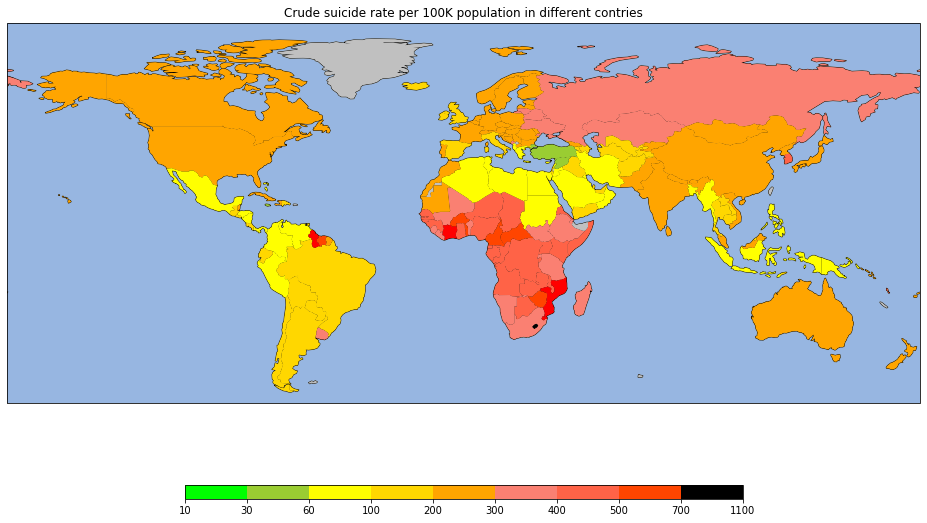

In [701]:
import matplotlib.pyplot as plt 
import cartopy
from cartopy.crs import PlateCarree
import cartopy.io.shapereader as shpreader

plt.figure(figsize=(20, 10))
ax = plt.axes(projection=PlateCarree())
add_basic_map_features(ax)
extend_without_antarctica = (-180, 180, -60, 90)
ax.set_extent(extend_without_antarctica, PlateCarree())

shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

reader = shpreader.Reader(shpfilename)
countries = reader.records()

skipped = set()
for country in countries:
    name = country.attributes['NAME_EN']

    # TODO: refine
    if name in names_map_to_data:
        name = names_map_to_data[name]
    
    # face_color = rate_to_rgb_color(get_country_rate(name))
    # if np.equal(face_color, gray).all():
    #     skipped.add(name)

    face_color = xxx_rate_to_color(get_country_rate(name))
    if face_color == 'silver':
        skipped.add(name)
    
    ax.add_geometries(
        [country.geometry], 
        PlateCarree(),
        facecolor=face_color,
        label=country.attributes['ADM0_A3'])


# colorbar
bounds = [10, 30, 60, 
          100, 200, 300, 
          400, 500, 700, 1100] 

color_names = ['lime', 'yellowgreen', 'yellow', 
                'gold', 'orange',  'salmon', 
                'tomato', 'orangered','red', 'black']

cmap = mpl.colors.ListedColormap(color_names)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

sm = plt.cm.ScalarMappable(cmap=cmap,norm=norm)
sm._A = []
plt.colorbar(sm,
             ax=ax, 
             location='bottom', 
             aspect=40, 
             shrink=0.5, 
             )


print(f'{len(skipped)} countries skipped.')
print(skipped)


plt.title('Crude suicide rate per 100K population in different contries')
plt.show()

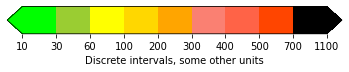

In [702]:
# Discrete intervals colorbar

#import matplotlib.colors as mcolors
import matplotlib as mpl 

bounds = [10, 30, 60, 
          100, 200, 300, 
          400, 500, 700, 1100] 

color_names = ['lime', 'yellowgreen', 'yellow', 
                'gold', 'orange',  'salmon', 
                'tomato', 'orangered','red', 'black']

cmap = mpl.colors.ListedColormap(color_names)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)


fig.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    cax=ax,
    boundaries=[0] + bounds + [13],  # Adding values for extensions.
    extend='both',
    ticks=bounds,
    spacing = 'uniform',
    orientation='horizontal',
    label='Discrete intervals, some other units',
)


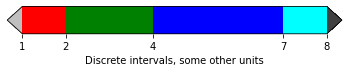

In [703]:
# Discrete intervals colorbar

import matplotlib as mpl 

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = (mpl.colors.ListedColormap(['red', 'green', 'blue', 'cyan'])
        .with_extremes(over='0.25', under='0.75'))

bounds = [1, 2, 4, 7, 8]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
fig.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    cax=ax,
    boundaries=[0] + bounds + [13],  # Adding values for extensions.
    extend='both',
    ticks=bounds,
    spacing='proportional',
    orientation='horizontal',
    label='Discrete intervals, some other units',
)


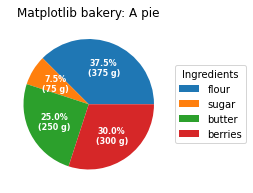

In [704]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["375 g flour",
          "75 g sugar",
          "250 g butter",
          "300 g berries"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()